In [1]:
import pandas, numpy, scipy

In [2]:
import sklearn, sklearn.preprocessing, sklearn.decomposition

In [3]:
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 
                            'xtick.labelsize':20, 
                            'ytick.labelsize':20, 
                            'axes.labelsize':20, 
                            'figure.figsize':(12 * 0.6, 9 * 0.6)})

In [4]:
input_dir = '/Users/adrian/research/vigur/data/metabolomics/targeted/'

basic_input_file = 'EC008_ROSA_PMVEC_INTRA_BASIC.xlsx'
positive_input_file = 'EC008_ROSA_PMVEC_INTRA_POS.xlsx'
negative_input_file = 'EC008_ROSA_PMVEC_INTRA_NEG.xlsx'

### read metadata

In [5]:
metadata = pandas.read_excel(input_dir+positive_input_file, sheet_name=0, index_col=1)

new_labels = [element.split('_')[0] for element in metadata.index.values]
rosetta = dict(zip(metadata.index.values, new_labels))
metadata.rename(index=rosetta, inplace=True)
metadata.head()

,Sample,Sample ID,BioReplicate,Timepoint,µM catech,TecRep,TNFalpha,LPS,cell number,LCMS Method,LCMS Analytical Order,LCMS BATCH
Label,,,,,,,,,,,,
Pool1,PMUEC_INTRA_EC008_103,Pool1_pos,-,-,-,-,-,-,-,HILIC_POS_10min,1,1
Pool1,PMUEC_INTRA_EC008_104,Pool1_pos,-,-,-,-,-,-,-,HILIC_POS_10min,2,1
Pool1,PMUEC_INTRA_EC008_105,Pool1_pos,-,-,-,-,-,-,-,HILIC_POS_10min,3,1
Pool2,PMUEC_INTRA_EC008_107,Pool2_pos,-,-,-,-,-,-,-,HILIC_POS_10min,4,1
008-02,PMUEC_INTRA_EC008_109,008-2,1,0,0,2,0,0,80000,HILIC_POS_10min,5,1


### read data

In [6]:
input_file = positive_input_file
    
path = input_dir + input_file
df = pandas.read_excel(path, sheet_name=1, index_col=0)

only_008 = [element for element in df.index if '008' in element]
subset = df.loc[only_008, :]

subset.head()

,Phenylalanine IS,Glucose IS,Carnitine IS,Carnitine IS.1,Glutamic Acid IS,AMP IS,Lysine IS,19:0 LPC IS,Alanine IS,ADMA,...,Fragment Degradation Glutathione,Glutathione reduced,Riboflavin,Lactoylglutathione,Glycogen,Cysteine Glutathione disulfide,Cysteineglycine disulfide.1,pipecolic acid,nAcSpermidine,AMP
Sample,,,,,,,,,,,,,,,,,,,,,
008-02_pos,381.920,1110.220,1763.122,1905.586,21.809,6882.966,249.678,42.460,35.297,2.826,...,29.284,74.000,990.352,12.177,0.291,0.569,1.097,84.008,8.252,37.335
008-10_pos,558.612,1450.393,3501.396,3473.510,44.195,9489.179,299.834,14.003,48.614,6.911,...,36.544,199.729,1256.403,20.306,0.654,6.001,3.696,110.300,14.337,22.860
008-22_pos,540.830,1339.520,3989.362,4002.762,17.616,10473.215,313.412,23.114,42.503,11.337,...,27.821,19.004,1101.448,6.423,0.445,5.493,6.563,85.742,4.907,33.281
008-01_pos,426.257,1126.078,3447.381,3512.656,25.144,5467.381,236.723,17.813,35.117,11.097,...,42.322,82.613,423.561,11.537,0.082,3.217,3.272,119.284,10.148,28.499
008-07_pos,411.752,1212.054,2183.467,2419.612,17.749,8622.508,287.382,20.272,37.812,17.176,...,28.451,75.672,1029.591,10.477,0.039,5.521,4.333,142.339,15.497,53.103


In [7]:
log2intensity = numpy.log2(subset+1)
log2intensity.head()

,Phenylalanine IS,Glucose IS,Carnitine IS,Carnitine IS.1,Glutamic Acid IS,AMP IS,Lysine IS,19:0 LPC IS,Alanine IS,ADMA,...,Fragment Degradation Glutathione,Glutathione reduced,Riboflavin,Lactoylglutathione,Glycogen,Cysteine Glutathione disulfide,Cysteineglycine disulfide.1,pipecolic acid,nAcSpermidine,AMP
Sample,,,,,,,,,,,,,,,,,,,,,
008-02_pos,8.580899,10.117929,10.784735,10.896776,4.511531,12.749024,7.969692,5.441616,5.181778,1.935837,...,4.920484,6.228819,9.953254,3.719950,0.368489,0.649845,1.068327,6.409527,3.209765,5.260590
008-10_pos,9.128283,10.503223,11.774126,11.762594,5.498091,13.212220,8.232824,3.907179,5.632675,2.983860,...,5.230510,7.649105,10.296231,4.413188,0.725959,2.807561,2.231432,6.798310,3.938944,4.576522
008-22_pos,9.081696,10.388577,11.962304,11.967141,4.218471,13.354555,8.296512,4.591799,5.443043,3.624920,...,4.849048,4.322217,10.106495,2.892002,0.531069,2.698885,2.918959,6.438659,2.562426,5.099337
008-01_pos,8.738960,10.138372,11.751703,11.778757,4.708408,12.416898,7.893138,4.233658,5.174606,3.596577,...,5.437028,6.385655,8.729828,3.648120,0.113700,2.076217,2.094912,6.910301,3.478713,4.882594
008-07_pos,8.689131,10.244428,11.093066,11.241156,4.228742,13.074059,8.171837,4.410884,5.278431,4.183963,...,4.880245,6.260628,10.009256,3.520674,0.055196,2.705093,2.414947,7.163287,4.044132,5.757637


In [8]:
new_labels = [element.split('_')[0] for element in log2intensity.index.values]
print(new_labels)
rosetta = dict(zip(log2intensity.index.values, new_labels))
log2intensity.rename(index=rosetta, inplace=True)
log2intensity.head()

['008-02', '008-10', '008-22', '008-01', '008-07', '008-18', '008-04', '008-23', '008-11', '008-25', '008-06', '008-27', '008-17', '008-12', '008-24', '008-08', '008-14', '008-20', '008-16', '008-28', '008-09', '008-21', '008-15', '008-03', '008-19', '008-26', '008-13', '008-05', '008-41', '008-36', '008-29', '008-42', '008-32', '008-37', '008-35', '008-44', '008-34', '008-39', '008-31', '008-43', '008-45', '008-30', '008-38', '008-33', '008-40']


,Phenylalanine IS,Glucose IS,Carnitine IS,Carnitine IS.1,Glutamic Acid IS,AMP IS,Lysine IS,19:0 LPC IS,Alanine IS,ADMA,...,Fragment Degradation Glutathione,Glutathione reduced,Riboflavin,Lactoylglutathione,Glycogen,Cysteine Glutathione disulfide,Cysteineglycine disulfide.1,pipecolic acid,nAcSpermidine,AMP
Sample,,,,,,,,,,,,,,,,,,,,,
008-02,8.580899,10.117929,10.784735,10.896776,4.511531,12.749024,7.969692,5.441616,5.181778,1.935837,...,4.920484,6.228819,9.953254,3.719950,0.368489,0.649845,1.068327,6.409527,3.209765,5.260590
008-10,9.128283,10.503223,11.774126,11.762594,5.498091,13.212220,8.232824,3.907179,5.632675,2.983860,...,5.230510,7.649105,10.296231,4.413188,0.725959,2.807561,2.231432,6.798310,3.938944,4.576522
008-22,9.081696,10.388577,11.962304,11.967141,4.218471,13.354555,8.296512,4.591799,5.443043,3.624920,...,4.849048,4.322217,10.106495,2.892002,0.531069,2.698885,2.918959,6.438659,2.562426,5.099337
008-01,8.738960,10.138372,11.751703,11.778757,4.708408,12.416898,7.893138,4.233658,5.174606,3.596577,...,5.437028,6.385655,8.729828,3.648120,0.113700,2.076217,2.094912,6.910301,3.478713,4.882594
008-07,8.689131,10.244428,11.093066,11.241156,4.228742,13.074059,8.171837,4.410884,5.278431,4.183963,...,4.880245,6.260628,10.009256,3.520674,0.055196,2.705093,2.414947,7.163287,4.044132,5.757637


In [9]:
internal_standards = [element for element in log2intensity.columns if 'IS' in element]
print(internal_standards)

['Phenylalanine IS', 'Glucose IS', 'Carnitine IS', 'Carnitine IS.1', 'Glutamic Acid IS', 'AMP IS', 'Lysine IS', '19:0 LPC IS', 'Alanine IS']


In [10]:
matplotlib.colors.TABLEAU_COLORS.keys()

dict_keys(['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan'])

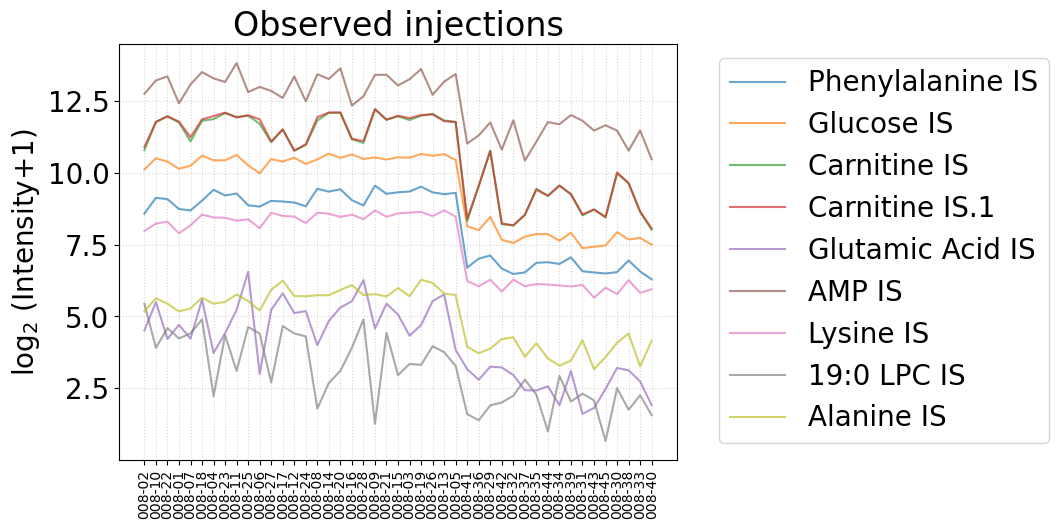

In [11]:
trend = log2intensity[internal_standards].mean(axis=1)
average = numpy.mean(trend)

tabcolors = list(matplotlib.colors.TABLEAU_COLORS.keys())

for i in range(len(internal_standards)):
    internal_standard = internal_standards[i]
    plotting_color = tabcolors[i]
    matplotlib.pyplot.plot(log2intensity[internal_standard], '-', color=plotting_color, ms=12, alpha=2/3, label=internal_standard)

matplotlib.pyplot.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
matplotlib.pyplot.title('Observed injections')
matplotlib.pyplot.ylabel('log$_2$ (Intensity+1)')
matplotlib.pyplot.xticks(rotation=90, fontsize=10)
matplotlib.pyplot.grid(alpha=0.5, ls=':')
matplotlib.pyplot.show()

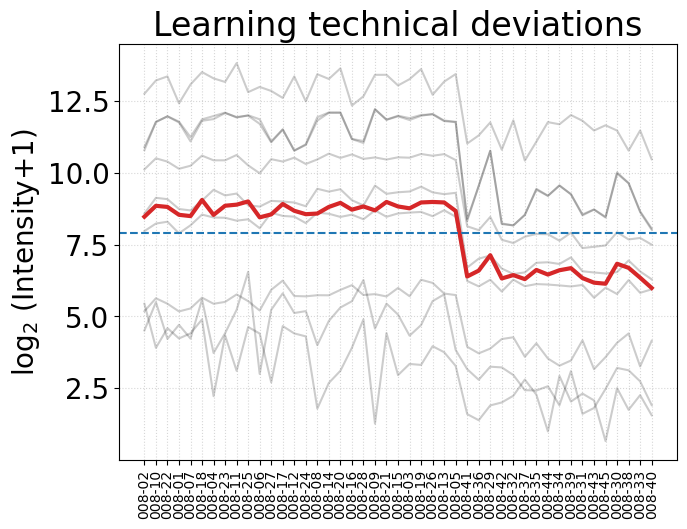

In [12]:
trend = log2intensity[internal_standards].mean(axis=1)
average = numpy.mean(trend)
for internal_standard in internal_standards:

    matplotlib.pyplot.plot(log2intensity[internal_standard], '-', color='black', ms=12, alpha=1/5)

matplotlib.pyplot.plot(log2intensity[internal_standards].mean(axis=1), '-', color='tab:red', lw=3)
matplotlib.pyplot.axhline(average, ls='--', color='tab:blue')

matplotlib.pyplot.title('Learning technical deviations')
matplotlib.pyplot.ylabel('log$_2$ (Intensity+1)')
matplotlib.pyplot.xticks(rotation=90, fontsize=10)
matplotlib.pyplot.grid(alpha=0.5, ls=':')
matplotlib.pyplot.show

correction = -(trend - average)

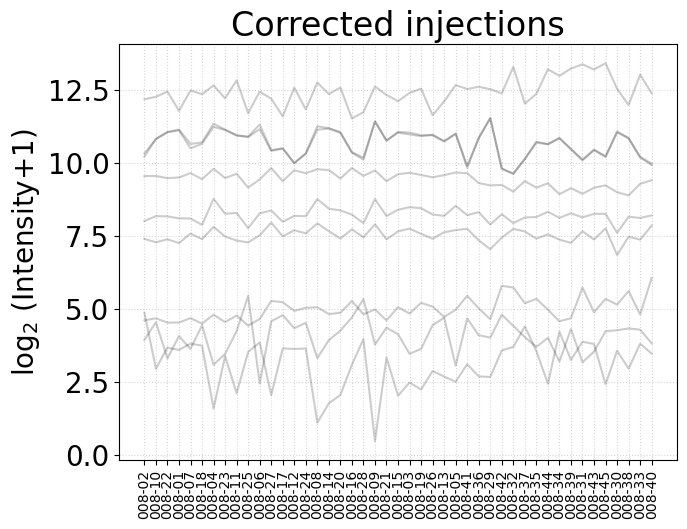

In [13]:
for internal_standard in internal_standards:
    injection = log2intensity[internal_standard]
    corrected = injection + correction
    matplotlib.pyplot.plot(corrected, '-', color='black', ms=12, alpha=1/5)

matplotlib.pyplot.title('Corrected injections')
matplotlib.pyplot.ylabel('log$_2$ (Intensity+1)')
matplotlib.pyplot.xticks(rotation=90, fontsize=10)
matplotlib.pyplot.grid(alpha=0.5, ls=':')
matplotlib.pyplot.show()

### correction

In [14]:
log2intensity.head()

,Phenylalanine IS,Glucose IS,Carnitine IS,Carnitine IS.1,Glutamic Acid IS,AMP IS,Lysine IS,19:0 LPC IS,Alanine IS,ADMA,...,Fragment Degradation Glutathione,Glutathione reduced,Riboflavin,Lactoylglutathione,Glycogen,Cysteine Glutathione disulfide,Cysteineglycine disulfide.1,pipecolic acid,nAcSpermidine,AMP
Sample,,,,,,,,,,,,,,,,,,,,,
008-02,8.580899,10.117929,10.784735,10.896776,4.511531,12.749024,7.969692,5.441616,5.181778,1.935837,...,4.920484,6.228819,9.953254,3.719950,0.368489,0.649845,1.068327,6.409527,3.209765,5.260590
008-10,9.128283,10.503223,11.774126,11.762594,5.498091,13.212220,8.232824,3.907179,5.632675,2.983860,...,5.230510,7.649105,10.296231,4.413188,0.725959,2.807561,2.231432,6.798310,3.938944,4.576522
008-22,9.081696,10.388577,11.962304,11.967141,4.218471,13.354555,8.296512,4.591799,5.443043,3.624920,...,4.849048,4.322217,10.106495,2.892002,0.531069,2.698885,2.918959,6.438659,2.562426,5.099337
008-01,8.738960,10.138372,11.751703,11.778757,4.708408,12.416898,7.893138,4.233658,5.174606,3.596577,...,5.437028,6.385655,8.729828,3.648120,0.113700,2.076217,2.094912,6.910301,3.478713,4.882594
008-07,8.689131,10.244428,11.093066,11.241156,4.228742,13.074059,8.171837,4.410884,5.278431,4.183963,...,4.880245,6.260628,10.009256,3.520674,0.055196,2.705093,2.414947,7.163287,4.044132,5.757637


In [15]:
correction.head()

Sample
008-02   -0.571644
008-10   -0.951337
008-22   -0.912769
008-01   -0.638369
008-07   -0.593617
dtype: float64

In [16]:
log2intensity_corrected = log2intensity.add(correction, axis=0)
log2intensity_corrected.head()

,Phenylalanine IS,Glucose IS,Carnitine IS,Carnitine IS.1,Glutamic Acid IS,AMP IS,Lysine IS,19:0 LPC IS,Alanine IS,ADMA,...,Fragment Degradation Glutathione,Glutathione reduced,Riboflavin,Lactoylglutathione,Glycogen,Cysteine Glutathione disulfide,Cysteineglycine disulfide.1,pipecolic acid,nAcSpermidine,AMP
Sample,,,,,,,,,,,,,,,,,,,,,
008-02,8.009255,9.546284,10.213090,10.325132,3.939887,12.177380,7.398047,4.869972,4.610134,1.364193,...,4.348840,5.657174,9.381609,3.148306,-0.203155,0.078201,0.496683,5.837882,2.638121,4.688946
008-10,8.176946,9.551885,10.822789,10.811257,4.546754,12.260883,7.281487,2.955842,4.681338,2.032523,...,4.279173,6.697768,9.344894,3.461851,-0.225378,1.856224,1.280095,5.846973,2.987607,3.625185
008-22,8.168928,9.475809,11.049535,11.054372,3.305703,12.441786,7.383744,3.679031,4.530274,2.712151,...,3.936280,3.409448,9.193726,1.979234,-0.381699,1.786117,2.006190,5.525890,1.649657,4.186569
008-01,8.100592,9.500003,11.113335,11.140388,4.070039,11.778529,7.254769,3.595289,4.536237,2.958209,...,4.798659,5.747287,8.091459,3.009751,-0.524668,1.437848,1.456543,6.271932,2.840344,4.244225
008-07,8.095514,9.650811,10.499449,10.647539,3.635125,12.480442,7.578220,3.817267,4.684814,3.590346,...,4.286628,5.667011,9.415639,2.927057,-0.538421,2.111476,1.821330,6.569670,3.450515,5.164020


### PCA

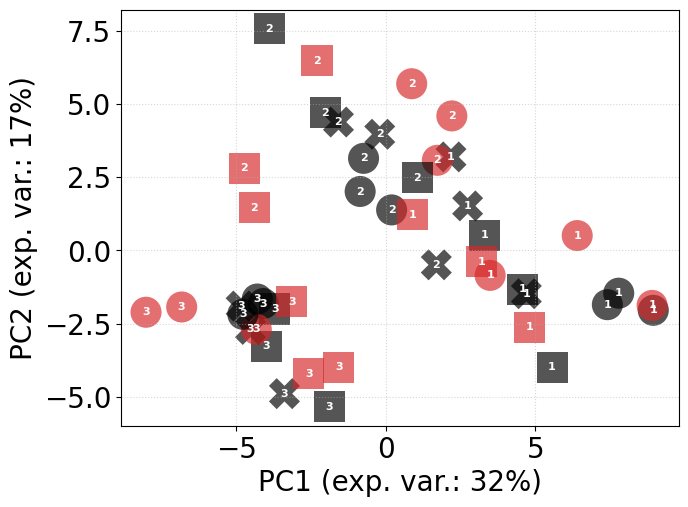

In [17]:
scaled_data = sklearn.preprocessing.StandardScaler().fit_transform(log2intensity_corrected)
model = sklearn.decomposition.PCA(n_components=2)
locations = model.fit_transform(scaled_data)
explained = model.explained_variance_ratio_

for j in range(len(locations)):
    label = log2intensity_corrected.index[j]

    # treatment
    treatment = metadata.loc[label, 'µM catech']
    if treatment == 0:
        the_color = 'black'
    elif treatment == 5:
        the_color = 'tab:red'
    else:
        print(treatment)
        raise ValueError('unknown treatment')
    # timepoint
    timepoint = metadata.loc[label, 'Timepoint']
    if timepoint == 0:
        the_marker = 'X'
    elif timepoint == 4:
        the_marker = 'o'
    elif timepoint == 24:
        the_marker = 's'
    else:
        raise ValueError('unknown timepoint')
    # replicate
    replicate = metadata.loc[label, 'BioReplicate']
    # plot
    matplotlib.pyplot.scatter(locations[j, 0], locations[j, 1], 
                              s=500, c=the_color, alpha=2/3, edgecolors='none', marker=the_marker)
    matplotlib.pyplot.text(locations[j, 0], locations[j, 1], replicate, 
                           fontsize=8, color='white', ha='center', va='center', weight='bold')

matplotlib.pyplot.xlabel('PC1 (exp. var.: {}%)'.format(int(explained[0]*100)))
matplotlib.pyplot.ylabel('PC2 (exp. var.: {}%)'.format(int(explained[1]*100)))
matplotlib.pyplot.grid(alpha=0.5, ls=':')

### identify differences

In [18]:
print(log2intensity_corrected.shape)
log2intensity_corrected.head()

(45, 58)


,Phenylalanine IS,Glucose IS,Carnitine IS,Carnitine IS.1,Glutamic Acid IS,AMP IS,Lysine IS,19:0 LPC IS,Alanine IS,ADMA,...,Fragment Degradation Glutathione,Glutathione reduced,Riboflavin,Lactoylglutathione,Glycogen,Cysteine Glutathione disulfide,Cysteineglycine disulfide.1,pipecolic acid,nAcSpermidine,AMP
Sample,,,,,,,,,,,,,,,,,,,,,
008-02,8.009255,9.546284,10.213090,10.325132,3.939887,12.177380,7.398047,4.869972,4.610134,1.364193,...,4.348840,5.657174,9.381609,3.148306,-0.203155,0.078201,0.496683,5.837882,2.638121,4.688946
008-10,8.176946,9.551885,10.822789,10.811257,4.546754,12.260883,7.281487,2.955842,4.681338,2.032523,...,4.279173,6.697768,9.344894,3.461851,-0.225378,1.856224,1.280095,5.846973,2.987607,3.625185
008-22,8.168928,9.475809,11.049535,11.054372,3.305703,12.441786,7.383744,3.679031,4.530274,2.712151,...,3.936280,3.409448,9.193726,1.979234,-0.381699,1.786117,2.006190,5.525890,1.649657,4.186569
008-01,8.100592,9.500003,11.113335,11.140388,4.070039,11.778529,7.254769,3.595289,4.536237,2.958209,...,4.798659,5.747287,8.091459,3.009751,-0.524668,1.437848,1.456543,6.271932,2.840344,4.244225
008-07,8.095514,9.650811,10.499449,10.647539,3.635125,12.480442,7.578220,3.817267,4.684814,3.590346,...,4.286628,5.667011,9.415639,2.927057,-0.538421,2.111476,1.821330,6.569670,3.450515,5.164020


In [19]:
for metabolite in log2intensity_corrected.columns:
    print(metabolite)
    for bio_rep in [1, 2, 3]:
        for time_point in [4, 24]:
        
            rules = (metadata['BioReplicate'] == bio_rep) & (metadata['Timepoint'] == time_point) & (metadata['µM catech'] == 0) 
            sampleIDs = list(metadata[rules].index.values)
            reference_values = log2intensity_corrected.loc[sampleIDs, metabolite].values
    
            rules = (metadata['BioReplicate'] == bio_rep) & (metadata['Timepoint'] == time_point) & (metadata['µM catech'] == 5) 
            sampleIDs = list(metadata[rules].index.values)
            drug_values = log2intensity_corrected.loc[sampleIDs, metabolite].values

            a = numpy.mean(drug_values)
            b = numpy.mean(reference_values)
            log2FC = a - b
            averageI = numpy.mean([a, b])
            [statistic, pvalue] = scipy.stats.ttest_ind(drug_values, reference_values)
            
            #if (pvalue < 0.05) & (numpy.abs(log2FC) > numpy.log2(1.1)):
            if (pvalue < 0.05):
                message = '\t {} Exp. {} T={} \t\t log2FC={:.2f} P={:.2e} \t\t I={:.2f}'.format(metabolite, bio_rep, time_point, log2FC, pvalue, averageI)
                print(message)
            else:
                pass
                #message = '\t {} Exp. {} T={} \t\t log2FC={:.2f} P={:.2e} \t\t I={:.2f}'.format(metabolite, bio_rep, time_point, log2FC, pvalue, averageI)
            #print(message)

#
# conclusion 2023.12.15
#

# nothing in more than one experiment.

Phenylalanine IS
Glucose IS
Carnitine IS
	 Carnitine IS Exp. 3 T=24 		 log2FC=0.58 P=1.22e-02 		 I=10.14
Carnitine IS.1
	 Carnitine IS.1 Exp. 3 T=24 		 log2FC=0.54 P=1.31e-02 		 I=10.17
Glutamic Acid IS
	 Glutamic Acid IS Exp. 1 T=4 		 log2FC=0.71 P=4.67e-02 		 I=3.22
AMP IS
	 AMP IS Exp. 3 T=24 		 log2FC=0.84 P=6.28e-04 		 I=12.85
Lysine IS
19:0 LPC IS
Alanine IS
	 Alanine IS Exp. 3 T=24 		 log2FC=-0.70 P=3.61e-02 		 I=5.42
ADMA
Arginine
	 Arginine Exp. 1 T=4 		 log2FC=-1.26 P=3.47e-02 		 I=7.30
Tryptophan
	 Tryptophan Exp. 3 T=4 		 log2FC=-0.26 P=1.10e-02 		 I=2.40
(Iso)leucine
Histidine
Betaine
Valine
	 Valine Exp. 3 T=4 		 log2FC=0.68 P=8.66e-03 		 I=1.88
Proline
Lysine
Phenylalanine
Glucose
Hypoxanthine
Mannitol
Nicotinamide
Phosphocholine
SAMe
	 SAMe Exp. 1 T=24 		 log2FC=-0.84 P=4.48e-02 		 I=5.96
Thiamine
	 Thiamine Exp. 2 T=24 		 log2FC=-0.51 P=2.06e-02 		 I=3.59
Carnitine
Acetyl-carnitine
C3 Carnitine
Choline
	 Choline Exp. 3 T=24 		 log2FC=-1.73 P=2.61e-02 		 I=5.37
sn-Glyce